In [1]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [2]:
#emotion_labelデータの読みこみ

data1_a_label_70 = pd.read_csv('emotion_label/session1/A/emotion_A_20201111_1_70.csv')

#feature_data(特徴量データーセット)の読みこみ
data1_a_record_all_feature_70 = pd.read_csv('feature/A/data1_a_70_record_all_feature.csv')

#確認
display(data1_a_record_all_feature_70)
display(data1_a_label_70)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,9205,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,9205,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,9012,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,9012,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,9012,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,2020-11-11 12:54:49,2020-11-11 12:54:53,9832.002,376.364,-2677.213,111.254,73.332,-87.704,30536.553996,3.426154e+04,...,9200,-47,-3789,-933,-2060,-812,8.610568,72.262946,0.782779,378.511950
650,2020-11-11 12:54:50,2020-11-11 12:54:54,9844.242,441.944,-2593.380,37.436,108.618,15.572,61678.375436,6.564020e+04,...,8739,-1098,-3789,-4580,-2108,-812,5.870841,52.258742,0.782779,392.086007
651,2020-11-11 12:54:51,2020-11-11 12:54:55,9820.866,323.123,-2669.401,-241.840,-48.918,71.333,78599.508044,1.586836e+05,...,8739,-1098,-4599,-4580,-2657,-1037,9.393346,46.718720,0.391389,366.460464
652,2020-11-11 12:54:52,2020-11-11 12:54:56,9706.397,324.454,-2956.586,-242.307,-201.340,50.513,146288.667391,1.591388e+05,...,8739,-1098,-4812,-4580,-2657,-1037,15.655577,36.202566,0.391389,155.225788


,start_time,finish_time,emotion_level,Unnamed: 3,Unnamed: 4
0,5:48,5:52,1,NaN,NaN
1,5:49,5:53,1,NaN,NaN
2,5:50,5:54,1,NaN,NaN
3,5:51,5:55,1,NaN,NaN
4,5:52,5:56,1,NaN,NaN
...,...,...,...,...,...
649,20:19,20:23,2,NaN,NaN
650,20:20,20:24,2,NaN,NaN
651,20:21,20:25,2,NaN,NaN
652,20:22,20:26,2,NaN,NaN


In [3]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

data1_a_label_70 = dropna(data1_a_label_70)

In [4]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=0)
    return a

data1_a_label_70 = dropna(data1_a_label_70)

In [5]:
#emotion_labelデータからtimeHMSとsubject列を消去

data1_a_label_70 = data1_a_label_70.drop(["start_time", "finish_time"], axis=1)

#確認
data1_a_label_70

,emotion_level
0,1
1,1
2,1
3,1
4,1
...,...
649,2
650,2
651,2
652,2


In [6]:
#feature_dataとemotion_labelデータを連結
data1_a_record_all_feature_70 = pd.concat([data1_a_record_all_feature_70, data1_a_label_70], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のAさんのデータを表示している)
display(data1_a_record_all_feature_70)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,1
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,1
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,1
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,1
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,2020-11-11 12:54:49,2020-11-11 12:54:53,9832.002,376.364,-2677.213,111.254,73.332,-87.704,30536.553996,3.426154e+04,...,-47,-3789,-933,-2060,-812,8.610568,72.262946,0.782779,378.511950,2
650,2020-11-11 12:54:50,2020-11-11 12:54:54,9844.242,441.944,-2593.380,37.436,108.618,15.572,61678.375436,6.564020e+04,...,-1098,-3789,-4580,-2108,-812,5.870841,52.258742,0.782779,392.086007,2
651,2020-11-11 12:54:51,2020-11-11 12:54:55,9820.866,323.123,-2669.401,-241.840,-48.918,71.333,78599.508044,1.586836e+05,...,-1098,-4599,-4580,-2657,-1037,9.393346,46.718720,0.391389,366.460464,2
652,2020-11-11 12:54:52,2020-11-11 12:54:56,9706.397,324.454,-2956.586,-242.307,-201.340,50.513,146288.667391,1.591388e+05,...,-1098,-4812,-4580,-2657,-1037,15.655577,36.202566,0.391389,155.225788,2


In [7]:
data1_a_record_all_feature_70

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,1
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,1
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,1
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,1
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,2020-11-11 12:54:49,2020-11-11 12:54:53,9832.002,376.364,-2677.213,111.254,73.332,-87.704,30536.553996,3.426154e+04,...,-47,-3789,-933,-2060,-812,8.610568,72.262946,0.782779,378.511950,2
650,2020-11-11 12:54:50,2020-11-11 12:54:54,9844.242,441.944,-2593.380,37.436,108.618,15.572,61678.375436,6.564020e+04,...,-1098,-3789,-4580,-2108,-812,5.870841,52.258742,0.782779,392.086007,2
651,2020-11-11 12:54:51,2020-11-11 12:54:55,9820.866,323.123,-2669.401,-241.840,-48.918,71.333,78599.508044,1.586836e+05,...,-1098,-4599,-4580,-2657,-1037,9.393346,46.718720,0.391389,366.460464,2
652,2020-11-11 12:54:52,2020-11-11 12:54:56,9706.397,324.454,-2956.586,-242.307,-201.340,50.513,146288.667391,1.591388e+05,...,-1098,-4812,-4580,-2657,-1037,15.655577,36.202566,0.391389,155.225788,2


In [8]:
#データ数の確認
print(len(data1_a_record_all_feature_70))

654


In [9]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している

data1_a_70_record_all_feature_1 = data1_a_record_all_feature_70.iloc[0:228]
data1_a_70_record_all_feature_2 = data1_a_record_all_feature_70.iloc[218:436]
data1_a_70_record_all_feature_3 = data1_a_record_all_feature_70.iloc[436:687]

In [10]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が2より大きいときはpositive
# emotion_levelの列の数値が3より小さいときはother

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
    return data_record_all_feature

data1_a_70_record_all_feature_1 = emotion_level_define(data1_a_70_record_all_feature_1)
data1_a_70_record_all_feature_2 = emotion_level_define(data1_a_70_record_all_feature_2)
data1_a_70_record_all_feature_3 = emotion_level_define(data1_a_70_record_all_feature_3)

/home/takagi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/takagi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/takagi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [11]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature


data1_a_70_record_all_feature_1 = emotion_level_drop(data1_a_70_record_all_feature_1)
data1_a_70_record_all_feature_2 = emotion_level_drop(data1_a_70_record_all_feature_2)
data1_a_70_record_all_feature_3 = emotion_level_drop(data1_a_70_record_all_feature_3)

/home/takagi/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
data1_a_70_record_all_feature_1

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,other
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,other
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,other
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,other
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2020-11-11 12:46:13,2020-11-11 12:46:17,9837.410,-18.740,-2749.156,-1.330,6.810,-20.360,6996.307900,1.716638e+03,...,-157,-3252,-543,-1444,-147,25.440313,28.557120,2.348337,70.758016,other
224,2020-11-11 12:46:14,2020-11-11 12:46:18,9816.906,-15.901,-2814.663,4.049,-8.977,-21.109,7316.801164,1.751391e+03,...,-125,-3405,-543,-1907,-147,25.440313,35.608706,2.348337,106.704087,other
225,2020-11-11 12:46:15,2020-11-11 12:46:19,9786.409,-12.373,-2918.253,-4.129,-13.691,-30.620,7910.531719,3.627112e+03,...,-335,-3469,-586,-1907,-440,25.440313,33.056038,0.391389,117.656195,other
226,2020-11-11 12:46:16,2020-11-11 12:46:20,9748.089,6.353,-3044.973,-2.453,-27.161,-29.462,7040.433079,1.259897e+04,...,-335,-3540,-647,-1907,-440,25.440313,30.543878,0.391389,120.186175,other


In [13]:
#全データからpositiveの数を確認
data1_a_70_record_all_feature_positive_1 = data1_a_70_record_all_feature_1[data1_a_70_record_all_feature_1.label == "positive"]
data1_a_70_record_all_feature_positive_1 = data1_a_70_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_a_70_record_all_feature_positive_1))

data1_a_70_record_all_feature_positive_2 = data1_a_70_record_all_feature_2[data1_a_70_record_all_feature_2.label == "positive"]
data1_a_70_record_all_feature_positive_2 = data1_a_70_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_a_70_record_all_feature_positive_2))

data1_a_70_record_all_feature_positive_3 = data1_a_70_record_all_feature_3[data1_a_70_record_all_feature_3.label == "positive"]
data1_a_70_record_all_feature_positive_3 = data1_a_70_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_a_70_record_all_feature_positive_3))

53
59
23


In [14]:
# #全データからotherの数を確認
data1_a_70_record_all_feature_other_1 = data1_a_70_record_all_feature_1[data1_a_70_record_all_feature_1.label == "other"]
data1_a_70_record_all_feature_other_1 = data1_a_70_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_a_70_record_all_feature_other_1))

data1_a_70_record_all_feature_other_2 = data1_a_70_record_all_feature_2[data1_a_70_record_all_feature_2.label == "other"]
data1_a_70_record_all_feature_other_2 = data1_a_70_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_a_70_record_all_feature_other_2))

data1_a_70_record_all_feature_other_3 = data1_a_70_record_all_feature_3[data1_a_70_record_all_feature_3.label == "other"]
data1_a_70_record_all_feature_other_3 = data1_a_70_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_a_70_record_all_feature_other_3))

175
159
195


In [15]:
#学習データとテストデータに分ける

train_data = pd.concat([data1_a_70_record_all_feature_1, data1_a_70_record_all_feature_2], ignore_index=True)
test_data = data1_a_70_record_all_feature_3

In [16]:
train_data

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,other
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,other
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,other
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,other
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2020-11-11 12:50:11,2020-11-11 12:50:15,9705.673,510.198,-3114.209,19.474,30.349,-21.564,9043.712071,1.235610e+04,...,114,-3513,-598,-1426,-324,5.870841,30.049608,1.174168,104.041995,positive
442,2020-11-11 12:50:12,2020-11-11 12:50:16,9693.644,505.750,-3150.717,24.222,26.471,-24.010,10169.867264,1.222800e+04,...,114,-3620,-549,-1426,-348,8.610568,28.853693,0.782779,147.029779,positive
443,2020-11-11 12:50:13,2020-11-11 12:50:17,9704.676,503.741,-3114.782,20.935,129.845,-23.996,11326.753024,1.189476e+04,...,114,-3620,-549,-1426,-348,8.610568,34.449934,0.782779,217.711032,positive
444,2020-11-11 12:50:14,2020-11-11 12:50:18,9747.235,500.972,-2968.763,30.434,144.557,-29.215,17428.519775,1.107126e+04,...,114,-3620,-549,-1426,-348,7.827789,39.185868,0.782779,137.445084,positive


In [17]:
train_data.columns

Index(['start_time', 'finish_time', 'accx_mean', 'accy_mean', 'accz_mean',
       'gyrx_mean', 'gyry_mean', 'gyrz_mean', 'accx_var', 'accy_var',
       'accz_var', 'gyrx_var', 'gyry_var', 'gyrz_var', 'accx_max', 'accy_max',
       'accz_max', 'gyrx_max', 'gyry_max', 'gyrz_max', 'accx_min', 'accy_min',
       'accz_min', 'gyrx_min', 'gyry_min', 'gyrz_min', 'accn_max_fq',
       'accn_max_peak', 'gyrn_max_fq', 'gyrn_max_peak', 'label'],
      dtype='object')

In [18]:
train_data = train_data[['start_time', 'finish_time', 'gyrx_mean', 'gyry_mean', 'gyrz_mean', 'gyrx_var', 'gyry_var', 'gyrz_var', 'gyrx_max', 'gyry_max', 'gyrz_max', 'gyrx_min', 'gyry_min', 'gyrz_min', 'gyrn_max_fq', 'gyrn_max_peak', 'label']]

In [19]:
train_data

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrx_var,gyry_var,gyrz_var,gyrx_max,gyry_max,gyrz_max,gyrx_min,gyry_min,gyrz_min,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 12:40:18,2020-11-11 12:40:22,22.665,5.644,5.692,205324.582775,597997.689264,16711.631136,1834,3074,547,-1501,-2919,-562,2.739726,327.603159,other
1,2020-11-11 12:40:19,2020-11-11 12:40:23,10.716,40.419,-23.403,224497.813344,567805.023439,22726.716591,2066,3074,547,-1501,-2919,-714,1.174168,324.534956,other
2,2020-11-11 12:40:20,2020-11-11 12:40:24,210.418,210.142,167.292,440862.123276,742656.481836,205307.848736,2108,3074,1633,-1501,-2468,-714,0.391389,421.393224,other
3,2020-11-11 12:40:21,2020-11-11 12:40:25,259.055,385.835,304.251,405569.557975,793478.601775,238257.093999,2108,3074,1633,-1501,-2468,-714,0.391389,562.283975,other
4,2020-11-11 12:40:22,2020-11-11 12:40:26,231.636,435.985,297.311,417799.129504,470606.594775,277375.570279,2108,2641,1633,-2049,-2212,-1074,0.391389,629.463949,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2020-11-11 12:50:11,2020-11-11 12:50:15,19.474,30.349,-21.564,44806.421324,94115.743199,11217.967904,645,909,395,-598,-1426,-324,1.174168,104.041995,positive
442,2020-11-11 12:50:12,2020-11-11 12:50:16,24.222,26.471,-24.010,36422.682716,99917.139159,11350.195900,645,909,328,-549,-1426,-348,0.782779,147.029779,positive
443,2020-11-11 12:50:13,2020-11-11 12:50:17,20.935,129.845,-23.996,42780.176775,132322.400975,10769.397984,846,1165,328,-549,-1426,-348,0.782779,217.711032,positive
444,2020-11-11 12:50:14,2020-11-11 12:50:18,30.434,144.557,-29.215,41550.529644,131890.584751,10295.250775,846,1165,328,-549,-1426,-348,0.782779,137.445084,positive


In [20]:
X_train = train_data.iloc[0:,2:16]
y_train = train_data.label

X_test = test_data.iloc[0:,2:16]
y_test = test_data.label

# X_train = train_data[['accx_mean', 'accy_mean', 'accz_mean', 'accx_var', 'accy_var', 'accz_var', 'accx_max', 'accy_max', 'accz_max', 'accx_min', 'accy_min', 'accz_min', 'accn_max_fq', 'accn_max_peak']]
# y_train = train_data.label

# X_test = test_data[['accx_mean', 'accy_mean', 'accz_mean', 'accx_var', 'accy_var', 'accz_var', 'accx_max', 'accy_max', 'accz_max', 'accx_min', 'accy_min', 'accz_min', 'accn_max_fq', 'accn_max_peak']]
# y_test = test_data.label

# X_train = train_data[['gyrx_mean', 'gyry_mean', 'gyrz_mean', 'gyrx_var', 'gyry_var', 'gyrz_var', 'gyrx_max', 'gyry_max', 'gyrz_max', 'gyrx_min', 'gyry_min', 'gyrz_min', 'gyrn_max_fq', 'gyrn_max_peak']]
# y_train = train_data.label

# X_test = test_data[['gyrx_mean', 'gyry_mean', 'gyrz_mean', 'gyrx_var', 'gyry_var', 'gyrz_var', 'gyrx_max', 'gyry_max', 'gyrz_max', 'gyrx_min', 'gyry_min', 'gyrz_min', 'gyrn_max_fq', 'gyrn_max_peak']]
# y_test = test_data.label

In [21]:
X_train

,gyrx_mean,gyry_mean,gyrz_mean,gyrx_var,gyry_var,gyrz_var,gyrx_max,gyry_max,gyrz_max,gyrx_min,gyry_min,gyrz_min,gyrn_max_fq,gyrn_max_peak
0,22.665,5.644,5.692,205324.582775,597997.689264,16711.631136,1834,3074,547,-1501,-2919,-562,2.739726,327.603159
1,10.716,40.419,-23.403,224497.813344,567805.023439,22726.716591,2066,3074,547,-1501,-2919,-714,1.174168,324.534956
2,210.418,210.142,167.292,440862.123276,742656.481836,205307.848736,2108,3074,1633,-1501,-2468,-714,0.391389,421.393224
3,259.055,385.835,304.251,405569.557975,793478.601775,238257.093999,2108,3074,1633,-1501,-2468,-714,0.391389,562.283975
4,231.636,435.985,297.311,417799.129504,470606.594775,277375.570279,2108,2641,1633,-2049,-2212,-1074,0.391389,629.463949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,19.474,30.349,-21.564,44806.421324,94115.743199,11217.967904,645,909,395,-598,-1426,-324,1.174168,104.041995
442,24.222,26.471,-24.010,36422.682716,99917.139159,11350.195900,645,909,328,-549,-1426,-348,0.782779,147.029779
443,20.935,129.845,-23.996,42780.176775,132322.400975,10769.397984,846,1165,328,-549,-1426,-348,0.782779,217.711032
444,30.434,144.557,-29.215,41550.529644,131890.584751,10295.250775,846,1165,328,-549,-1426,-348,0.782779,137.445084


正答率0.8944954128440367
誤った個数：23
classification report
              precision    recall  f1-score   support

       other       0.89      1.00      0.94       195
    positive       0.00      0.00      0.00        23

    accuracy                           0.89       218
   macro avg       0.45      0.50      0.47       218
weighted avg       0.80      0.89      0.84       218

Confusion matrix, without normalization
[[195   0]
 [ 23   0]]


/home/takagi/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


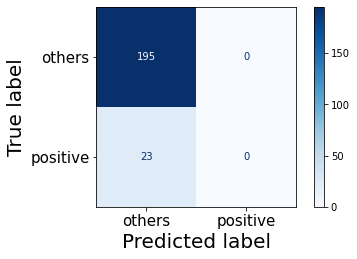

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


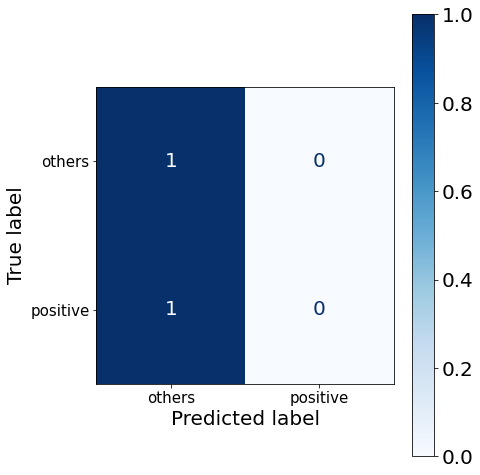

In [22]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

level_names = ["others", "positive"]

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
#     disp.ax_.set_title(title)
    plt.tick_params(axis='both', which='major', labelsize=15)
    print(title)
    print(disp.confusion_matrix)
    plt.rcParams.update({'font.size': 20})
    plt.xlabel("Predicted label", fontsize=20, rotation=0)
    plt.ylabel("True label", fontsize=20)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [23]:
random.feature_importances_

array([0.04912258, 0.06171822, 0.06150139, 0.06475903, 0.06275011,
       0.08843967, 0.08217302, 0.10240208, 0.10059136, 0.06965969,
       0.07715731, 0.10619341, 0.02188283, 0.05164929])

# 1_70 0:229 229:458 458:687
# 1_70 0:228 228:456 456:687
# 1_70 0:218 218:436 436:687
# 1_80 0:212 212:424 424:687

In [24]:
other = "0"
positive = "1"

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)
X_train_time = data1_a_record_all_feature_70.iloc[0:436]
X_train_time = X_train_time.iloc[0:,0:2]
X_train_time = X_train_time.reset_index(drop=True)
X_train_time = pd.concat([X_train_time, y_train], axis=1)
X_train_time.columns = ["start", "finish", "emotion_level"]
X_train_time.loc[X_train_time["emotion_level"] == "other", "label"] = 0
X_train_time.loc[X_train_time["emotion_level"] == "positive", "label"] = 1
X_train_time

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test_time = data1_a_record_all_feature_70.iloc[436:687]
y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "emotion_level"]
y_test_time.loc[y_test_time["emotion_level"] == "other", "label"] = 0
y_test_time.loc[y_test_time["emotion_level"] == "positive", "label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)
predict_time = data1_a_record_all_feature_70.iloc[436:687]
predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "emotion_level"]
predict_time.loc[predict_time["emotion_level"] == "other", "label"] = 0
predict_time.loc[predict_time["emotion_level"] == "positive", "label"] = 1
predict_time

,start,finish,emotion_level,label
0,2020-11-11 12:50:16,2020-11-11 12:50:20,other,0.0
1,2020-11-11 12:50:17,2020-11-11 12:50:21,other,0.0
2,2020-11-11 12:50:18,2020-11-11 12:50:22,other,0.0
3,2020-11-11 12:50:19,2020-11-11 12:50:23,other,0.0
4,2020-11-11 12:50:20,2020-11-11 12:50:24,other,0.0
...,...,...,...,...
213,2020-11-11 12:54:49,2020-11-11 12:54:53,other,0.0
214,2020-11-11 12:54:50,2020-11-11 12:54:54,other,0.0
215,2020-11-11 12:54:51,2020-11-11 12:54:55,other,0.0
216,2020-11-11 12:54:52,2020-11-11 12:54:56,other,0.0


In [25]:
y_test_time

,start,finish,emotion_level,label
0,2020-11-11 12:50:16,2020-11-11 12:50:20,positive,1.0
1,2020-11-11 12:50:17,2020-11-11 12:50:21,positive,1.0
2,2020-11-11 12:50:18,2020-11-11 12:50:22,positive,1.0
3,2020-11-11 12:50:19,2020-11-11 12:50:23,positive,1.0
4,2020-11-11 12:50:20,2020-11-11 12:50:24,positive,1.0
...,...,...,...,...
213,2020-11-11 12:54:49,2020-11-11 12:54:53,other,0.0
214,2020-11-11 12:54:50,2020-11-11 12:54:54,other,0.0
215,2020-11-11 12:54:51,2020-11-11 12:54:55,other,0.0
216,2020-11-11 12:54:52,2020-11-11 12:54:56,other,0.0


In [26]:
test = pd.concat([X_train_time, y_test_time], ignore_index=True, axis=0)
predicted = predict_time

In [27]:
test["start"] = pd.to_datetime(test['start'])
predicted["start"] = pd.to_datetime(predicted['start'])

test.set_index("start", inplace=True)
predicted.set_index("start", inplace=True)

In [28]:
test

,finish,emotion_level,label
start,,,
2020-11-11 12:40:18,2020-11-11 12:40:22,other,0.0
2020-11-11 12:40:19,2020-11-11 12:40:23,other,0.0
2020-11-11 12:40:20,2020-11-11 12:40:24,other,0.0
2020-11-11 12:40:21,2020-11-11 12:40:25,other,0.0
2020-11-11 12:40:22,2020-11-11 12:40:26,other,0.0
...,...,...,...
2020-11-11 12:54:49,2020-11-11 12:54:53,other,0.0
2020-11-11 12:54:50,2020-11-11 12:54:54,other,0.0
2020-11-11 12:54:51,2020-11-11 12:54:55,other,0.0


In [29]:
predicted

,finish,emotion_level,label
start,,,
2020-11-11 12:50:16,2020-11-11 12:50:20,other,0.0
2020-11-11 12:50:17,2020-11-11 12:50:21,other,0.0
2020-11-11 12:50:18,2020-11-11 12:50:22,other,0.0
2020-11-11 12:50:19,2020-11-11 12:50:23,other,0.0
2020-11-11 12:50:20,2020-11-11 12:50:24,other,0.0
...,...,...,...
2020-11-11 12:54:49,2020-11-11 12:54:53,other,0.0
2020-11-11 12:54:50,2020-11-11 12:54:54,other,0.0
2020-11-11 12:54:51,2020-11-11 12:54:55,other,0.0


/home/takagi/anaconda3/lib/python3.8/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


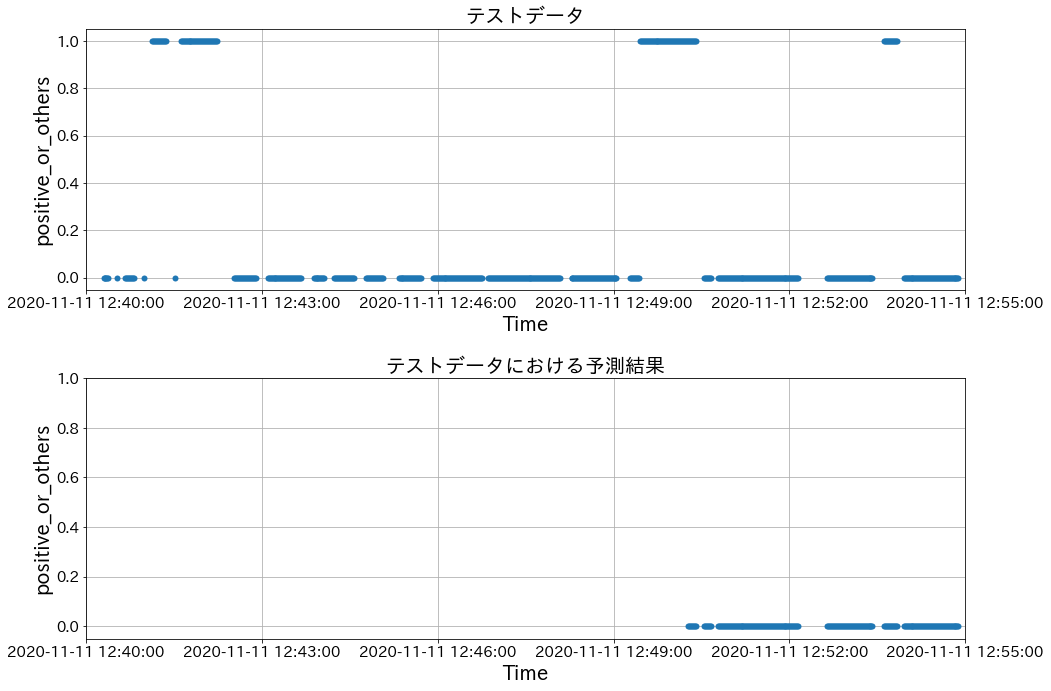

In [30]:
import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(test.index, test["label"], marker="o", markeredgewidth=0,linewidth=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.set_xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,55,0))
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax1.set_title("テストデータ", fontsize=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("positive_or_others")
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(predicted.index, predicted["label"], marker="o", markeredgewidth=0,linewidth=0)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.set_xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,55,0))
ax2.set_ylim(-0.05, 1)
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax2.set_title("テストデータにおける予測結果", fontsize=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("positive_or_others")
ax2.grid(True)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.show()